### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import retrieve as rt
from plot_confusion_matrix import plot_confusion_matrix
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
import obtain as ob

### Obtain

In [2]:
poverty_df = ob.upload_county_acs_data('ACSDP5Y2012.DP03_data_with_overlays_2019-12-31T163946.csv')
df = poverty_df
population_df = ob.upload_county_acs_data('ACSDP5Y2012.DP05_data_with_overlays_2019-12-31T193014.csv')
df = ob.merge_acs_data(df,population_df)
df = ob.remove_duplicate_countystate(df) 
num_df, object_df = ob.separate_num_columns(df)
pull_columns = [i for i in num_df.columns]
cms_df = ob.cms_data()
df = cms_df.merge(df.drop(columns =['County','State']), how='left', on=['CountyState'])
model_df = df
target = 'ratio_to_max_payment'
step = 10
bins = [i/100 for i in range(0,100+step,step)]
bins[-1] +=.01
cms_labels =ob.cms_procedure_dummy_labels(df).columns
num_df, object_df = ob.separate_num_columns(model_df)
num_df, a = ob.remove_cms(num_df)

In [3]:
def random_forest(data, target_column='ratio_to_max_payment', show=20, n_estimators=100, max_depth = 5):
    y= data[target_column]
    X = data.drop(columns=[target_column])
    data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                        test_size = 0.25)


    forest = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth)
    forest.fit(data_train,target_train)
    df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)
    print(df_feature_importance[:show])
    print(forest.score(data_train,target_train), forest.score(data_test,target_test))
    return forest, df_feature_importance


In [4]:
dsd = pd.cut(df[target],bins, right=False).unique()
dsd = dsd.sort_values().astype(str)
num_df[target] = pd.cut(df[target],bins, right=False).astype(str)
#num_df[target] = num_df[target].apply(lambda x:'(0.9, 1.0]' if x == 'nan')


In [5]:
model_clean, feat = random_forest(num_df)
X = num_df.drop(columns=[target])
pred = model_clean.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                         0.051632
BRONCHITIS_&_ASTHMA                                                                                         0.042062
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.039968
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                                                       0.031252
Percent_RACE_One_race_Asian                                                                                 0.030365
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                 0.024969
with_mcc                                                                                                    0.024080
Percent_RACE_One_race_Asian_Chinese                                                                         0.023739
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Two_or_more_r

In [15]:
range(cnf_matrix.shape[0])

range(0, 10)

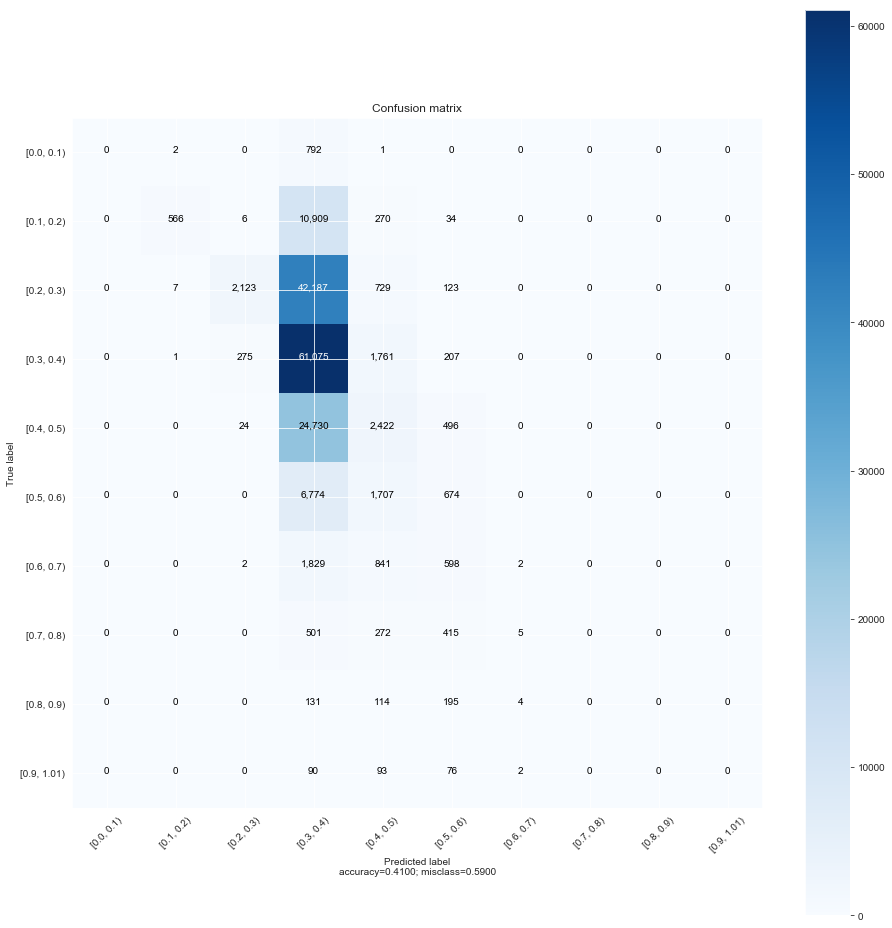

In [6]:

ax = plot_confusion_matrix(cnf_matrix, dsd, normalize=False)


In [32]:
label = pd.cut(df[target],bins).astype(str)
predicted = []

for i in label.unique():
    num_df[target] = label == i
    print(i)
    model_clean, feat = random_forest(num_df, show=10)
    X = num_df.drop(columns=[target])
    a = float(i.split(',')[0][1:])- float(i.split(',')[1][:-1])/2

    predicted.append(list(model_clean.predict(X)*a))

(0.2, 0.3]
with_mcc                                                               0.075025
MISC_DISORDERS_OF_NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES             0.045158
CARDIAC_ARRHYTHMIA_&_CONDUCTION_DISORDERS                              0.028364
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)            0.027827
RACE_Some_other_race                                                   0.026575
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone            0.022030
RACE_One_race_Asian_Filipino                                           0.019567
RACE_One_race_Some_other_race                                          0.019384
Percent_RACE_One_race_Asian                                            0.018239
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.017745
dtype: float64
0.7232334134654695 0.7222998994284593
(0.3, 0.4]
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                  0.051127
BRONCHITIS_&_ASTHMA                          

(0.7, 0.8]
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                 0.041543
Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)         0.039776
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_carpooled                   0.028762
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                 0.025931
Percent_COMMUTING_TO_WORK_Walked                                            0.024591
Percent_RACE_One_race_Asian_Chinese                                         0.022598
RACE_One_race_Asian_Filipino                                                0.022027
COMMUTING_TO_WORK_Walked                                                    0.019543
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Some_other_race_alone    0.019502
RACE_One_race_Asian                                                         0.018822
dtype: float64
0.9928371682284256 0.992224102828268
(0.8, 0.9]
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                 

In [29]:
dsd = [i for i in dsd]

In [33]:
s =pd.Series(data=[i for i in range(0,100)], name='hat')

In [36]:
s.iloc[[3,4]]= 8
s

0      0
1      1
2      2
3      8
4      8
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
      ..
70    70
71    71
72    72
73    73
74    74
75    75
76    76
77    77
78    78
79    79
80    80
81    81
82    82
83    83
84    84
85    85
86    86
87    87
88    88
89    89
90    90
91    91
92    92
93    93
94    94
95    95
96    96
97    97
98    98
99    99
Name: hat, Length: 100, dtype: int64